# Transformer Lens - Interpretation

- Formerly known as **EasyTransformer**
- Library for doing **Mechanistic interpretability** ->  The goal of mechanistic interpretability is to take a trained model and reverse engineer the algorithms the model learned during training from its weights.
- Which is important for **transparency, debugging, compliance, and ethical considerations in AI**.
- TransformerLens lets you load in an open source language model, like GPT-2, and exposes the internal activations of the model to you.
- You can cache any internal activation in the model, and add in functions to edit, remove or replace these activations as the model runs.
- TransformerLens comes loaded with >40 open source GPT-style models. You can load any of them in with ```HookedTransformer.from_pretrained(MODEL_NAME)```.


### Introduction

## Installing & Setup

In [ ]:
import os
DEVELOPMENT_MODE = False
# Detect if we're running in Google Colab
try:
    import google.colab
    IN_COLAB = True
    print("Running as a Colab notebook")
except:
    IN_COLAB = False

# Install if in Colab
if IN_COLAB:
    %pip install transformer_lens
    %pip install circuitsvis

Running as a Colab notebook
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.1/119.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.7/739.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.6/412.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.7/867.7 kB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.7/704.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 MB 9.0 MB/s eta 

In [ ]:
import circuitsvis as cv
# Testing that the library works
cv.examples.hello("Pretrained Prodigies")

## Importing & Setting up Libraries

In [ ]:
# Import stuff
import torch
import torch.nn as nn
import tqdm.auto as tqdm
import plotly.express as px
from matplotlib import pyplot as plt


In [ ]:
# import transformer_lens
import transformer_lens.utils as utils
from transformer_lens.hook_points import (
    HookPoint,
)  # Hooking utilities
from transformer_lens import HookedTransformer, FactoredMatrix
from transformers import AutoModelForCausalLM

In [ ]:
torch.set_grad_enabled(False)

## Utils

## Configs

In [ ]:
model_name = 'roneneldan/TinyStories-1Layer-21M'
device = utils.get_device()
print(f"The notebook is running on {device}")

The notebook is running on cuda


In [ ]:
model = AutoModelForCausalLM.from_pretrained(model_name, output_attentions=True)

config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/269M [00:00<?, ?B/s]

### Model - TinyStoeies-1Layer-21M



In [ ]:
model

GPTNeoForCausalLM(
  (transformer): GPTNeoModel(
    (wte): Embedding(50257, 1024)
    (wpe): Embedding(2048, 1024)
    (drop): Dropout(p=0.0, inplace=False)
    (h): ModuleList(
      (0): GPTNeoBlock(
        (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (attn): GPTNeoAttention(
          (attention): GPTNeoSelfAttention(
            (attn_dropout): Dropout(p=0.0, inplace=False)
            (resid_dropout): Dropout(p=0.0, inplace=False)
            (k_proj): Linear(in_features=1024, out_features=1024, bias=False)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=False)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=False)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
        )
        (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (mlp): GPTNeoMLP(
          (c_fc): Linear(in_features=1024, out_features=4096, bias=True)
          (c_proj): Linear(

## Loading and Running Models

In [ ]:
model = HookedTransformer.from_pretrained(model_name, device=device)

tokenizer_config.json:   0%|          | 0.00/722 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

Loaded pretrained model roneneldan/TinyStories-1Layer-21M into HookedTransformer


To try the model out, let's find the loss on this text! Models can be run on a single string or a tensor of tokens (shape: [batch, position], all integers), and the possible return types are:
* "logits" (shape [batch, position, d_vocab], floats),
* "loss" (the cross-entropy loss when predicting the next token),
* "both" (a tuple of (logits, loss))
* None (run the model, but don't calculate the logits - this is faster when we only want to use intermediate activations)

In [ ]:
model_description_text = """Pretrained Prodigies are working on the Assignment Number 6. Seems like a cool assignment! Let see!"""
loss = model(model_description_text, return_type="loss")
print("Model loss:", loss)

Model loss: tensor(10.3236, device='cuda:0')


## Caching all Activations

The first basic operation when doing mechanistic interpretability is to break open the black box of the model and look at all of the internal activations of a model. This can be done with `logits, cache = model.run_with_cache(tokens)`..

Every activation inside the model begins with a batch dimension. Here, because we only entered a single batch dimension, that dimension is always length 1 and kinda annoying, so passing in the `remove_batch_dim=True` keyword removes it.

In [ ]:
text = "At the bustling city market, Sarah, an ambitious chef, carefully selected the freshest vegetables for her new recipe, while her friend John, a curious photographer, captured the vibrant colors and textures around them, and nearby, an elderly couple, reminiscing about their childhood memories"
tokens = model.to_tokens(text)
print(tokens.device)
logits, cache = model.run_with_cache(tokens, remove_batch_dim=True)

cuda:0


In [ ]:
tokens, tokens.shape

(tensor([[50256,  2953,   262, 46609,  1748,  1910,    11, 10490,    11,   281,
          14742, 21221,    11,  7773,  6163,   262, 34093,  3634, 13701,   329,
            607,   649,  8364,    11,   981,   607,  1545,  1757,    11,   257,
          11040, 16413,    11,  7907,   262, 21266,  7577,   290, 20028,  1088,
            606,    11,   290,  6716,    11,   281, 13830,  3155,    11, 21484,
           2259,   546,   511,  9963,  9846]], device='cuda:0'),
 torch.Size([1, 55]))

In [ ]:
logits, logits.shape

(tensor([[[ 8.9446,  8.7579,  0.3871,  ..., -2.0825,  3.2959, 12.0309],
          [ 7.5460,  8.6666,  0.9634,  ..., -2.0105,  2.6986,  5.9149],
          [ 4.0155,  5.7623, -0.0217,  ..., -2.1756,  0.3462,  6.8921],
          ...,
          [ 2.1272,  1.5827,  0.9565,  ..., -2.5444,  0.6530,  6.4028],
          [ 8.2431,  2.7899,  1.1092,  ..., -2.5355,  0.7307,  5.1843],
          [13.5773,  6.6738, -0.0940,  ..., -1.9422,  1.5845,  4.4381]]],
        device='cuda:0'),
 torch.Size([1, 55, 50257]))

In [ ]:
cache

ActivationCache with keys ['hook_embed', 'hook_pos_embed', 'blocks.0.hook_resid_pre', 'blocks.0.ln1.hook_scale', 'blocks.0.ln1.hook_normalized', 'blocks.0.attn.hook_q', 'blocks.0.attn.hook_k', 'blocks.0.attn.hook_v', 'blocks.0.attn.hook_attn_scores', 'blocks.0.attn.hook_pattern', 'blocks.0.attn.hook_z', 'blocks.0.hook_attn_out', 'blocks.0.hook_resid_mid', 'blocks.0.ln2.hook_scale', 'blocks.0.ln2.hook_normalized', 'blocks.0.mlp.hook_pre', 'blocks.0.mlp.hook_post', 'blocks.0.hook_mlp_out', 'blocks.0.hook_resid_post', 'ln_final.hook_scale', 'ln_final.hook_normalized']

Let's visualize the attention pattern of all the heads in layer 0, using [Alan Cooney's CircuitsVis library](https://github.com/alan-cooney/CircuitsVis) (based on [Anthropic's PySvelte library](https://github.com/anthropics/PySvelte)).

We look this the attention pattern in `cache`, an `ActivationCache` object, by entering in the name of the activation, followed by the layer index (here, the activation is called "attn" and the layer index is 0). This has shape [head_index, destination_position, source_position], and we use the `model.to_str_tokens` method to convert the text to a list of tokens as strings, since there is an attention weight between each pair of tokens.

This visualization is interactive! Try hovering over a token or head.

In [ ]:
print(type(cache))
attention_pattern = cache["pattern", 0, "attn"]
print(attention_pattern.shape)
str_tokens = model.to_str_tokens(text)
print(str_tokens)

<class 'transformer_lens.ActivationCache.ActivationCache'>
torch.Size([16, 55, 55])
['<|endoftext|>', 'At', ' the', ' bustling', ' city', ' market', ',', ' Sarah', ',', ' an', ' ambitious', ' chef', ',', ' carefully', ' selected', ' the', ' fres', 'hest', ' vegetables', ' for', ' her', ' new', ' recipe', ',', ' while', ' her', ' friend', ' John', ',', ' a', ' curious', ' photographer', ',', ' captured', ' the', ' vibrant', ' colors', ' and', ' textures', ' around', ' them', ',', ' and', ' nearby', ',', ' an', ' elderly', ' couple', ',', ' reminis', 'cing', ' about', ' their', ' childhood', ' memories']


In [ ]:
text = "Once upon a time, in a faraway land, there lived a little girl named Lily. She loved to explore and discover new things. One day, she went on a walk with her mommy and daddy. They walked and walked until they came to a big cliff."
tokens = model.to_tokens(text)
logits, cache = model.run_with_cache(tokens, remove_batch_dim=True)
attention_pattern = cache["pattern", 0, "attn"]
str_tokens = model.to_str_tokens(text)
print("Layer 0 Head Attention Patterns:")
cv.attention.attention_patterns(tokens=str_tokens, attention=attention_pattern)

Layer 0 Head Attention Patterns:


In [ ]:
text = "At the bustling city market, Sarah, an ambitious chef, carefully selected the freshest vegetables for her new recipe, while her friend John, a curious photographer, captured the vibrant colors and textures around them, and nearby, an elderly couple, reminiscing about their childhood memories"
tokens = model.to_tokens(text)
logits, cache = model.run_with_cache(tokens, remove_batch_dim=True)
attention_pattern = cache["pattern", 0, "attn"]
str_tokens = model.to_str_tokens(text)
print("Layer 0 Head Attention Patterns:")
cv.attention.attention_patterns(tokens=str_tokens, attention=attention_pattern)

Layer 0 Head Attention Patterns:


##### Add another example that make sense -> I added but it was not that great to compare

### Observations and Key points

- There are 16 Attention heads in this model:
  <br>
  Self Attention: Head-8 is the prominant example of such an attention
  <br>
  Distance Based Attention: Head-5 is the prominant exampe of distance based attention
  <br>
  Semantic Based Attention: Head-11 & Head-12 is one of the prominant example of semantic based attention
  <br>
  Other type of contextual relationships: Head-9, Head-12 and Head-13 plays differnt understanding of context (which is awesome)



## Hooks - Intervening on Activations

One of the great things about interpreting neural networks is that we have *full control* over our system. From a computational perspective, we know exactly what operations are going on inside (even if we don't know what they mean!). And we can make precise, surgical edits and see how the model's behaviour and other internals change.


The key feature here is hook points. Every activation inside the transformer is surrounded by a hook point, which allows us to edit or intervene on it.

We do this by adding a hook function to that activation. The hook function maps current_activation_value, hook_point to new_activation_value. As the model is run, it computes that activation as normal, and then the hook function is applied to compute a replacement, and that is substituted in for the activation. The hook function can be an arbitrary Python function, so long as it returns a tensor of the correct shape.

In [ ]:
import pandas as pd
from collections import defaultdict

layer_to_ablate = 0
heads_index_to_ablate = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
head_contributions = []

def head_ablation_hook(head_index, value, hook):
    value[:, :, head_index, :] = 0.
    return value

for head_index_to_ablate in heads_index_to_ablate:
    original_loss = model(tokens, return_type="loss")
    ablated_loss = model.run_with_hooks(
        tokens,
        return_type="loss",
        fwd_hooks=[(
            utils.get_act_name("v", layer_to_ablate),
            lambda value, hook: head_ablation_hook(head_index_to_ablate, value, hook)
            )]
        )
    loss_diff = round(original_loss.item() - ablated_loss.item(), 2)
    head_contributions.append({
        'Head Index': head_index_to_ablate,
        'Original Loss': round(original_loss.item(), 2),
        'Ablated Loss': round(ablated_loss.item(), 2),
        'Loss Difference': loss_diff
    })

# Creating DataFrame from the list of dictionaries
df = pd.DataFrame(head_contributions)
df = df.sort_values(by='Loss Difference', ascending=True)

# To display this table in Google Colab
df = df.sort_values('Head Index')
df

,Head Index,Original Loss,Ablated Loss,Loss Difference
0,0,4.52,4.71,-0.19
1,1,4.52,4.52,0.00
2,2,4.52,4.52,0.00
3,3,4.52,4.82,-0.30
4,4,4.52,4.66,-0.14
5,5,4.52,4.59,-0.07
6,6,4.52,5.01,-0.48
7,7,4.52,4.68,-0.15
8,8,4.52,5.01,-0.49
9,9,4.52,4.71,-0.19


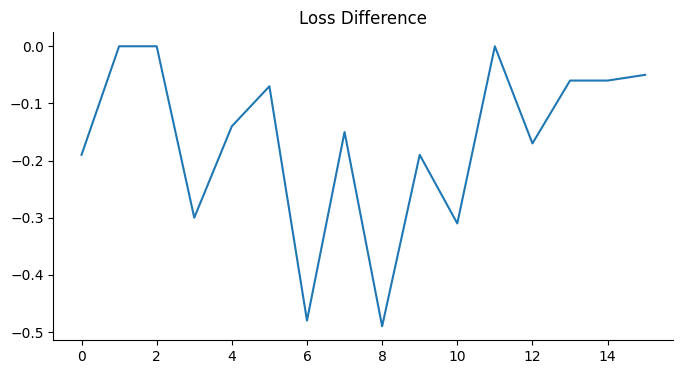

In [ ]:
df['Loss Difference'].plot(kind='line', figsize=(8, 4), title='Loss Difference')
plt.gca().spines[['top', 'right']].set_visible(False)

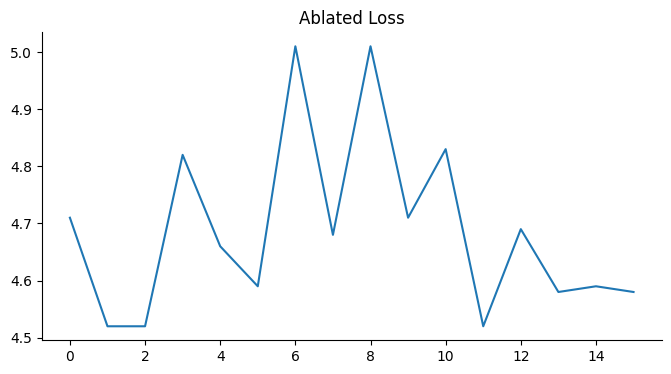

In [ ]:
df['Ablated Loss'].plot(kind='line', figsize=(8, 4), title='Ablated Loss')
plt.gca().spines[['top', 'right']].set_visible(False)